## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)

# Combine the data into a single dataset

full_data_df = pd.merge(mouse_metadata_df, study_results_df, on = "Mouse ID", how = "outer")

# Display the data table for preview

full_data_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Check the number of mice.
full_data_df['Mouse ID'].nunique()

249

In [3]:
# Find any duplicate rows with the same Mouse ID's and Timepoints. 

duplicate_rows_full_data_df = full_data_df[full_data_df.duplicated(['Mouse ID', 'Timepoint'])]

duplicate_rows_full_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Delete the data related to the duplicate rows 

cleaned_df = full_data_df.drop(full_data_df[full_data_df['Mouse ID'] == 'g989'].index)

cleaned_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Recheck the number of mice
cleaned_df['Mouse ID'].nunique()


248

## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, 
# standard deviation, and SEM of the tumor volume for each regimen.

regimen_group = cleaned_df.groupby(['Drug Regimen'])

regimen_mean = regimen_group['Tumor Volume (mm3)'].mean()
regimen_median = regimen_group['Tumor Volume (mm3)'].median()
regimen_variance = regimen_group['Tumor Volume (mm3)'].var()
regimen_std = regimen_group['Tumor Volume (mm3)'].std()
regimen_sem =  regimen_group['Tumor Volume (mm3)'].sem()

summary_dict = {'Mean of Tumor Volume':regimen_mean, 'Median of Tumor Volume':regimen_median, 
                'Variance of Tumor Volume':regimen_variance, 
                'Standard Deviation of Tumor Volume':regimen_std, 'SEM of Tumor Volume':regimen_sem }
summary_df = pd.DataFrame(summary_dict)

summary_df

,Mean of Tumor Volume,Median of Tumor Volume,Variance of Tumor Volume,Standard Deviation of Tumor Volume,SEM of Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<AxesSubplot:title={'center':'Number of Mice per Regimen'}, xlabel='Drug Regimen'>

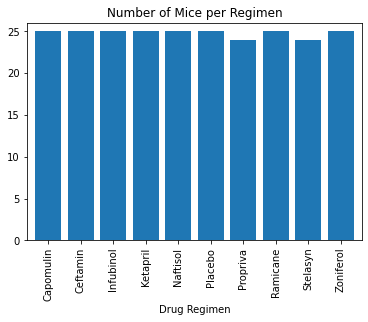

In [7]:
# Generate a bar plot showing the total numberw of mice for each drug regimen using pandas.
# There should be a single bar per regimen
mice_per_regimen_series = regimen_group['Mouse ID'].nunique()
mice_per_regimen_df = mice_per_regimen_series.to_frame()
mice_per_regimen_df = mice_per_regimen_df.rename(columns = {'Mouse ID':'Number of Unique Mice'})
mice_per_regimen_df.plot(kind="bar", figsize = (6,4), ylim = (0,26), legend = False,
                        title = 'Number of Mice per Regimen', width = 0.8)

Text(0.5, 1.0, 'Number of Mice per Regimen')

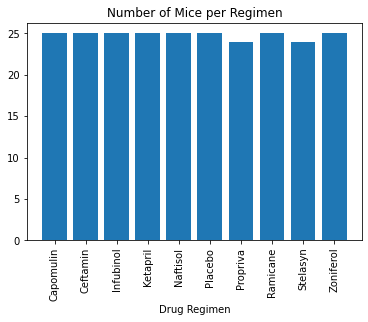

In [8]:
# Generate identical bar plot using pyplot instead of pandas.
mice_per_regimen_list = mice_per_regimen_df['Number of Unique Mice'].tolist()
x_axis = mice_per_regimen_df.index
plt.bar(x_axis, mice_per_regimen_list)
plt.xticks(rotation = 'vertical')
plt.xlabel("Drug Regimen")
plt.title("Number of Mice per Regimen")


array([<AxesSubplot:ylabel='Number of Mice'>], dtype=object)

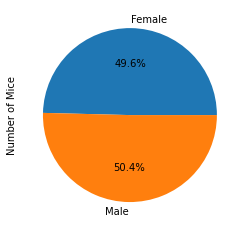

In [9]:
#Generate a pie plot showing the distribution of female versus male mice using pandas
regimen_by_gender = cleaned_df.groupby(['Sex'])
regimen_by_gender_series = regimen_by_gender['Mouse ID'].nunique()
regimen_by_gender_df = regimen_by_gender_series.to_frame()
regimen_by_gender_df = regimen_by_gender_df.rename(columns = {'Mouse ID':'Number of Mice'})
regimen_by_gender_list = regimen_by_gender_df['Number of Mice'].tolist()

mouse_gender_pie_chart = regimen_by_gender_df.plot(kind = 'pie', subplots = True, legend = False,
                                                  autopct= "%1.1f%%")

mouse_gender_pie_chart

([<matplotlib.patches.Wedge at 0x2096e7d24c8>,
 [Text(0.013934097579311265, 1.0999117423341975, 'Female'),
  Text(-0.0139340975793114, -1.0999117423341975, 'Male')],
 [Text(0.007600416861442507, 0.5999518594550168, '49.6%'),
  Text(-0.007600416861442581, -0.5999518594550168, '50.4%')])

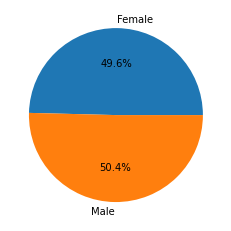

In [10]:
# Generate identical pie plot using pyplot
labels = regimen_by_gender_df.index
plt.pie(regimen_by_gender_list, labels = labels, autopct= "%1.1f%%")



## Quartiles, Outliers and Boxplots

In [11]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# HINT: Not all mice lived until timepoint 45
# Start by getting the last (greatest) timepoint for each mouse
mouse_group = cleaned_df.groupby(['Mouse ID'])
last_times = mouse_group['Timepoint'].transform(max) == cleaned_df['Timepoint']
last_times_df = cleaned_df[last_times]

last_capomulin_times_df = last_times_df.loc[last_times_df['Drug Regimen'] == 'Capomulin']
last_ramicane_times_df = last_times_df.loc[last_times_df['Drug Regimen'] == 'Ramicane']
last_infubinol_times_df = last_times_df.loc[last_times_df['Drug Regimen'] == 'Infubinol']
last_ceftamin_times_df = last_times_df.loc[last_times_df['Drug Regimen'] == 'Ceftamin']

Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens.

In [12]:
# Calculate quartiles, IQR, and identify potential outliers for each regimen.

capolin_quartiles = last_capomulin_times_df['Tumor Volume (mm3)'].quantile([.25, .5, .75])
capolin_upperq = capolin_quartiles[.75]
capolin_lowerq = capolin_quartiles[.25]
capolin_iqr = capolin_upperq - capolin_lowerq
capolin_upper_bound = capolin_upperq + (1.5*capolin_iqr)
capolin_lower_bound = capolin_lowerq - (1.5*capolin_iqr)
capolin_outlier_= last_capomulin_times_df.loc[(last_capomulin_times_df['Tumor Volume (mm3)'] > capolin_upper_bound) | 
                                                       (last_capomulin_times_df['Tumor Volume (mm3)'] < capolin_lower_bound)]

ramicane_quartiles = last_ramicane_times_df['Tumor Volume (mm3)'].quantile([.25, .5, .75])
ramicane_upperq = ramicane_quartiles[.75]
ramicane_lowerq = ramicane_quartiles[.25]
ramicane_iqr = ramicane_upperq - ramicane_lowerq
ramicane_upper_bound = ramicane_upperq + (1.5*ramicane_iqr)
ramicane_lower_bound = ramicane_lowerq - (1.5*ramicane_iqr)
ramicane_outlier = last_ramicane_times_df.loc[(last_ramicane_times_df['Tumor Volume (mm3)'] > ramicane_upper_bound) | 
                                                       (last_ramicane_times_df['Tumor Volume (mm3)'] < ramicane_lower_bound)]

infubinol_quartiles = last_infubinol_times_df['Tumor Volume (mm3)'].quantile([.25, .5, .75])
infubinol_upperq = infubinol_quartiles[.75]
infubinol_lowerq = infubinol_quartiles[.25]
infubinol_iqr = infubinol_upperq - infubinol_lowerq
infubinol_upper_bound = infubinol_upperq + (1.5*infubinol_iqr)
infubinol_lower_bound = infubinol_lowerq - (1.5*infubinol_iqr)
infubinol_outlier = last_infubinol_times_df.loc[(last_infubinol_times_df['Tumor Volume (mm3)'] > infubinol_upper_bound) | 
                                                       (last_infubinol_times_df['Tumor Volume (mm3)'] < infubinol_lower_bound)]

ceftamin_quartiles = last_ceftamin_times_df['Tumor Volume (mm3)'].quantile([.25, .5, .75])
ceftamin_upperq = ceftamin_quartiles[.75]
ceftamin_lowerq = ceftamin_quartiles[.25]
ceftamin_iqr = ceftamin_upperq - ceftamin_lowerq
ceftamin_upper_bound = ceftamin_upperq + (1.5*ceftamin_iqr)
ceftamin_lower_bound = ceftamin_lowerq - (1.5*ceftamin_iqr)
ceftamin_outlier = last_ceftamin_times_df.loc[(last_ceftamin_times_df['Tumor Volume (mm3)'] > ceftamin_upper_bound) | 
                                                       (last_ceftamin_times_df['Tumor Volume (mm3)'] < ceftamin_lower_bound)]

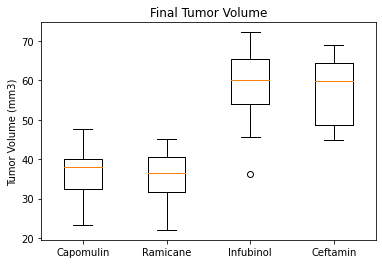

In [31]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# There should be a single chart with four box plots inside it.

data_to_plot = [last_capomulin_times_df['Tumor Volume (mm3)'],
                last_ramicane_times_df['Tumor Volume (mm3)'],
               last_infubinol_times_df['Tumor Volume (mm3)'],
               last_ceftamin_times_df['Tumor Volume (mm3)']]

regimen_names_tumors = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(data_to_plot)
ax1.set_xticklabels(regimen_names_tumors)
plt.show()

## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse 
# treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight 
# for all mice in the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


# Observations and Insights